## RQ1: How has customer sentiment evolved across the periods of pre-COVID, during COVID-19, and post-COVID, based on the analysis of customer reviews, and what are the key insights from the binary sentiment classification into positive and negative categories?

### This section is contain the following analysis :
 
<b> Sentimen Analysis (Week 3-4)
    
    1. Perform Sentiment Classification
    2. Comparison of Model Results
    3. Evaluate Sentiment Classification
    4. Sentiment Visualisation using DistilBERT
    
<b> Identifying Frequently Used Keywords (Week 5)
    
    1. Keywords Processing
    2. Keywords Visualization

# Week 3-4 Sentiment Analysis

# 1. Perform Sentiment Classification

## 1.1 Load the VADER and DistilBERT Models and Tokenizer

In [1]:
pip install torch transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - torchaudio -> python[version='>=3.13,<3.14.0a0']

Your python: python=3.11

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available

In [3]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

PyTorch version: 2.5.1
CUDA available: False


In [4]:
conda install pytorch torchvision torchaudio cpuonly -c pytorch

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.11.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.11.2



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Move the model to the specified device
model.to(device)
print("Model loaded successfully!")

Using device: cpu
Model loaded successfully!


In [6]:
pip install --upgrade transformers tokenizers

Note: you may need to restart the kernel to use updated packages.


In [7]:
import transformers
import tokenizers

print(f"Transformers version: {transformers.__version__}")
print(f"Tokenizers version: {tokenizers.__version__}")

Transformers version: 4.47.1
Tokenizers version: 0.21.0


In [8]:
pip install --upgrade tokenizers

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install transformers==4.31.0 tokenizers==0.13.3

  Obtaining dependency information for transformers==4.31.0 from https://files.pythonhosted.org/packages/21/02/ae8e595f45b6c8edee07913892b3b41f5f5f273962ad98851dc6a564bbb9/transformers-4.31.0-py3-none-any.whl.metadata
  Using cached transformers-4.31.0-py3-none-any.whl.metadata (116 kB)
  Obtaining dependency information for tokenizers==0.13.3 from https://files.pythonhosted.org/packages/0c/e0/f51b2d52fcc2c64e0b81da0a1c68d57b3859212143dbc64b0d175ed78693/tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl.metadata (6.7 kB)
Using cached transformers-4.31.0-py3-none-any.whl (7.4 MB)
Using cached tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl (3.9 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
  

In [10]:
from transformers import DistilBertTokenizer

# lode tokenizer from pretrained model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [11]:
# Import libraries
from transformers import DistilBertTokenizer

In [12]:
from transformers import DistilBertTokenizer

def preprocess_text(text, tokenizer):
    inputs = tokenizer(
        text,
        return_tensors='pt',
        max_length=128,
        truncation=True,
        padding='max_length'
    )
    return inputs

In [13]:
# Load the cleaned dataset
import pandas as pd

df = pd.read_csv('cleaned_singapore_airlines_reviews.csv')

df['inputs'] = df['cleaned_review'].apply(lambda x: preprocess_text(x, tokenizer))

In [14]:
# Import required libraries
import torch
from transformers import DistilBertTokenizer

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Define preprocessing function
def preprocess_text(text):
    inputs = tokenizer(
        text,
        return_tensors='pt',
        max_length=128,
        truncation=True,
        padding='max_length'
    )
    inputs = {key: value.to(device) for key, value in inputs.items()}
    return inputs

# Apply preprocessing
df['inputs'] = df['cleaned_review'].apply(preprocess_text)

Using device: cpu


## 1.2 Preprocess Reviews 

In [15]:
import pandas as pd
# Load the cleaned dataset
df = pd.read_csv('cleaned_singapore_airlines_reviews.csv')

# Function to preprocess the text for DistilBERT
def preprocess_text(text):
    # Tokenize the input text and convert to tensors
    inputs = tokenizer(text, return_tensors='pt', max_length=128, truncation=True, padding='max_length')
    inputs = {key: value.to(device) for key, value in inputs.items()} 
    return inputs

# Apply preprocessing to all reviews in your cleaned dataset
df['inputs'] = df['cleaned_review'].apply(preprocess_text)


In [16]:
from transformers import DistilBertForSequenceClassification

# Load the pre-trained model
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased-finetuned-sst-2-english'
)
model.to(device)  # Move the model to the specified device (CPU or GPU)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [17]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## 1.3 Perform Sentiment Classification with DistilBERT

In [18]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
import pandas as pd
import torch.nn.functional as F  # For softmax

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Load model
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased-finetuned-sst-2-english'
)
model.to(device)

# Define classify_sentiment function
def classify_sentiment_and_score(review):
    """
    Classify sentiment and calculate compound score for a given review.
    
    Parameters:
        review (str): The review text to analyze.
        
    Returns:
        tuple: Sentiment label (positive/negative) and Compound Score.
    """
    # Tokenize and prepare input
    inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True).to(device)
    
    with torch.no_grad():
        outputs = model(**inputs)  # Get logits from the model
        logits = outputs.logits  # Extract raw predictions
        
        # Apply softmax to calculate probabilities
        probabilities = F.softmax(logits, dim=1).squeeze()
        
        # Calculate Compound Score
        compound_score = (probabilities[1] - probabilities[0]).item()
        
        # Determine sentiment label
        sentiment_map = {0: 'negative', 1: 'positive'}
        predicted_class = torch.argmax(logits, dim=1).item()
        sentiment_label = sentiment_map.get(predicted_class, 'neutral')
        
        return sentiment_label, compound_score

# Load DataFrame
df = pd.read_csv('cleaned_singapore_airlines_reviews.csv')

# Apply the function to each review and split the results into two columns
df[['sentiment', 'compound_score']] = df['cleaned_review'].apply(
    lambda x: pd.Series(classify_sentiment_and_score(x))
)

# Save the updated DataFrame
df.to_csv('classified_reviews_with_sentiment_and_compound.csv', index=False)
print("Dataset saved as 'classified_reviews_with_sentiment_and_compound.csv'.")


Dataset saved as 'classified_reviews_with_sentiment_and_compound.csv'.


## 1.4 Perform Sentiment Classification with VADER

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment_vader(text):
    """
    Classify sentiment and calculate compound score using VADER.
    
    Parameters:
        text (str): The review text to analyze.
        
    Returns:
        tuple: Sentiment label (positive/negative) and Compound Score.
    """
    # Get sentiment scores from VADER
    scores = analyzer.polarity_scores(text)
    
    # Determine sentiment based on compound score
    compound_score = scores['compound']
    if compound_score >= 0.00:
        sentiment_label = 'positive'
    elif compound_score < -0.00:
        sentiment_label = 'negative'
  
    
    return sentiment_label, compound_score

# Load the cleaned dataset
df = pd.read_csv('cleaned_singapore_airlines_reviews.csv')

# Apply the VADER sentiment analysis function to each review
df[['vader_sentiment', 'vader_compound_score']] = df['cleaned_review'].apply(
    lambda x: pd.Series(classify_sentiment_vader(x))
)

# Save the updated DataFrame with VADER results
df.to_csv('vader_sentiment_results.csv', index=False)
print("Dataset saved as 'vader_sentiment_results.csv'.")

Dataset saved as 'vader_sentiment_results.csv'.


# 2. Comparison of Model Results

In [20]:
import pandas as pd

# Load datasets
df = pd.read_csv('classified_reviews_with_sentiment_and_compound.csv')  # DistilBERT results
vader_df = pd.read_csv('vader_sentiment_results.csv')  # VADER results

# Merge DistilBERT and VADER results
df['vader_sentiment'] = vader_df['vader_sentiment']

# Count and percentage for DistilBERT
distilbert_counts = df['sentiment'].value_counts()
distilbert_percentages = distilbert_counts / len(df) * 100

# Count and percentage for VADER
vader_counts = df['vader_sentiment'].value_counts()
vader_percentages = vader_counts / len(df) * 100

# Display results
print("DistilBERT Sentiment Counts and Percentages:")
print(distilbert_counts)
print(distilbert_percentages)

print("\nVADER Sentiment Counts and Percentages:")
print(vader_counts)
print(vader_percentages)

DistilBERT Sentiment Counts and Percentages:
sentiment
positive    5625
negative    4375
Name: count, dtype: int64
sentiment
positive    56.25
negative    43.75
Name: count, dtype: float64

VADER Sentiment Counts and Percentages:
vader_sentiment
positive    8679
negative    1321
Name: count, dtype: int64
vader_sentiment
positive    86.79
negative    13.21
Name: count, dtype: float64


## Mismatched sentiment results

In [21]:
# Find mismatched sentiment results
mismatches = df[df['sentiment'] != df['vader_sentiment']]

# Display 5 example mismatched reviews
print("Example Mismatched Reviews:")
print(mismatches[['cleaned_review', 'sentiment', 'vader_sentiment']].head(5))

Example Mismatched Reviews:
                                       cleaned_review sentiment  \
0   used airline go singapore london heathrow issu...  negative   
2   booked paid received email confirmation extra ...  negative   
10  singapore airline sq may one largest airline w...  negative   
15  premium economy cabin ripoff always fly premiu...  negative   
16  sq lose luggage found provided information lik...  negative   

   vader_sentiment  
0         positive  
2         positive  
10        positive  
15        positive  
16        positive  


In [22]:
import pandas as pd

# Load individual results
distilbert_df = pd.read_csv('classified_reviews_with_sentiment_and_compound.csv')  # DistilBERT results
vader_df = pd.read_csv('vader_sentiment_results.csv')  # VADER results

# Ensure both dataframes have the same index or merge on a common key
combined_df = pd.merge(
    distilbert_df,
    vader_df[['cleaned_review', 'vader_sentiment']],  # Assuming 'cleaned_review' as the common column
    on='cleaned_review'
)

# Save the combined dataframe
combined_df.to_csv('classified_reviews_with_sentiment_and_vader.csv', index=False)
print("Combined file saved as 'classified_reviews_with_sentiment_and_vader.csv'")

# Load the newly created file
df = pd.read_csv('classified_reviews_with_sentiment_and_vader.csv')

# Find mismatched sentiment results
mismatches = df[df['sentiment'] != df['vader_sentiment']]

# Save the mismatched reviews to a CSV file
output_file = 'mismatched_reviews.csv'
mismatches.to_csv(output_file, index=False)

# Display a summary and first 5 mismatched reviews
print(f"Total mismatched reviews: {len(mismatches)}")
print("Example Mismatched Reviews:")
print(mismatches[['cleaned_review', 'sentiment', 'vader_sentiment']].head(5))
print(f"Mismatched reviews saved to '{output_file}'.")

Combined file saved as 'classified_reviews_with_sentiment_and_vader.csv'
Total mismatched reviews: 3130
Example Mismatched Reviews:
                                       cleaned_review sentiment  \
0   used airline go singapore london heathrow issu...  negative   
2   booked paid received email confirmation extra ...  negative   
10  singapore airline sq may one largest airline w...  negative   
15  premium economy cabin ripoff always fly premiu...  negative   
16  sq lose luggage found provided information lik...  negative   

   vader_sentiment  
0         positive  
2         positive  
10        positive  
15        positive  
16        positive  
Mismatched reviews saved to 'mismatched_reviews.csv'.


# 3. Evaluate Sentiment Classification

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load the processed dataset with both DistilBERT and VADER sentiment results
df = pd.read_csv('classified_reviews_with_sentiment_and_compound.csv')  # DistilBERT
vader_df = pd.read_csv('vader_sentiment_results.csv')  # VADER
df['vader_sentiment'] = vader_df['vader_sentiment']

# Map sentiments to numeric labels (1 for positive, 0 for negative)
df['distilbert_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df['vader_numeric'] = df['vader_sentiment'].map({'positive': 1, 'negative': 0})

# Drop rows with NaN values in 'distilbert_numeric' or 'vader_numeric'
df = df.dropna(subset=['distilbert_numeric', 'vader_numeric'])

# Prepare a surrogate ground truth using DistilBERT predictions
X = df['cleaned_review']
y = df['distilbert_numeric']  # Surrogate label based on DistilBERT

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Random Forest Classifier as a surrogate evaluation model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

# Evaluate DistilBERT Sentiment Results
y_pred_distilbert = clf.predict(tfidf.transform(df['cleaned_review']))
y_pred_proba_distilbert = clf.predict_proba(tfidf.transform(df['cleaned_review']))[:, 1]

distilbert_report = classification_report(y, y_pred_distilbert, output_dict=True)
roc_auc_distilbert = roc_auc_score(y, y_pred_proba_distilbert)

print("DistilBERT Evaluation (Surrogate Model):")
print(classification_report(y, y_pred_distilbert))
print(f"ROC-AUC Score: {roc_auc_distilbert}")

# Evaluate VADER Sentiment Results
y = df['vader_numeric']  # Surrogate label based on VADER
y_pred_vader = clf.predict(tfidf.transform(df['cleaned_review']))
y_pred_proba_vader = clf.predict_proba(tfidf.transform(df['cleaned_review']))[:, 1]

vader_report = classification_report(y, y_pred_vader, output_dict=True)
roc_auc_vader = roc_auc_score(y, y_pred_proba_vader)

print("\nVADER Evaluation (Surrogate Model):")
print(classification_report(y, y_pred_vader))
print(f"ROC-AUC Score: {roc_auc_vader}")

# Save Reports to CSV
pd.DataFrame(distilbert_report).transpose().to_csv("distilbert_surrogate_report.csv")
pd.DataFrame(vader_report).transpose().to_csv("vader_surrogate_report.csv")

# Summarized Comparison
print("\nSummary Comparison:")
print(f"DistilBERT ROC-AUC: {roc_auc_distilbert}")
print(f"VADER ROC-AUC: {roc_auc_vader}")

DistilBERT Evaluation (Surrogate Model):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4375
           1       0.96      0.98      0.97      5625

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

ROC-AUC Score: 0.9948882895238095

VADER Evaluation (Surrogate Model):
              precision    recall  f1-score   support

           0       0.29      0.96      0.45      1321
           1       0.99      0.65      0.79      8679

    accuracy                           0.69     10000
   macro avg       0.64      0.80      0.62     10000
weighted avg       0.90      0.69      0.74     10000

ROC-AUC Score: 0.8721100092900462

Summary Comparison:
DistilBERT ROC-AUC: 0.9948882895238095
VADER ROC-AUC: 0.8721100092900462


# 4. Sentiment Visualisation using DistilBERT

## 4.1 Analyze Sentiment Distribution

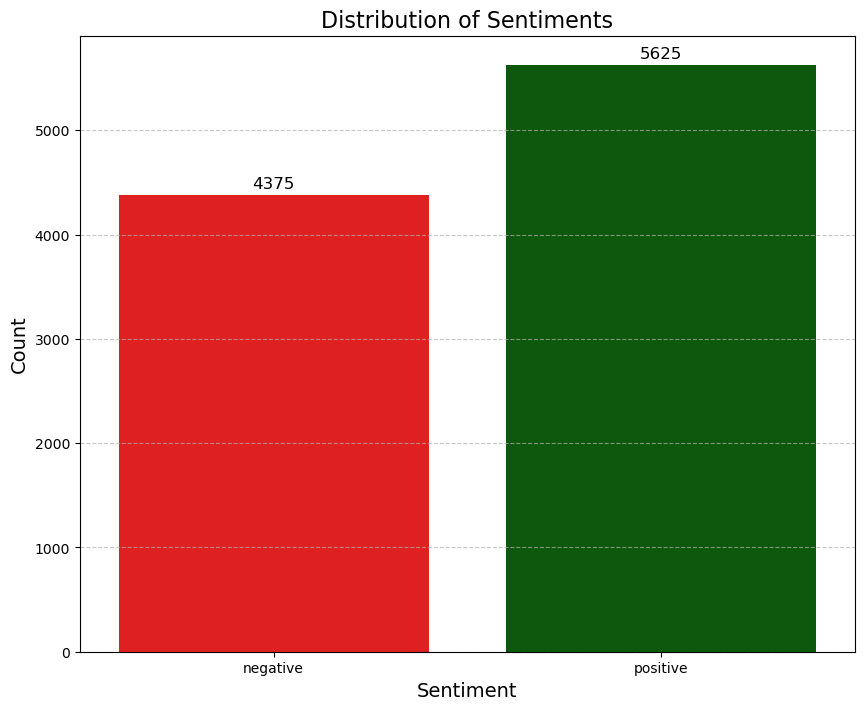

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('classified_reviews_with_sentiment_and_compound.csv')

# Set the color palette for positive (green) and negative (red)
colors = {'positive': 'darkgreen', 'negative': 'red'}

# Plot the distribution of sentiments
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    x='sentiment', 
    data=df, 
    palette=[colors.get(sentiment) for sentiment in df['sentiment'].unique()]
)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set titles and labels
plt.title('Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

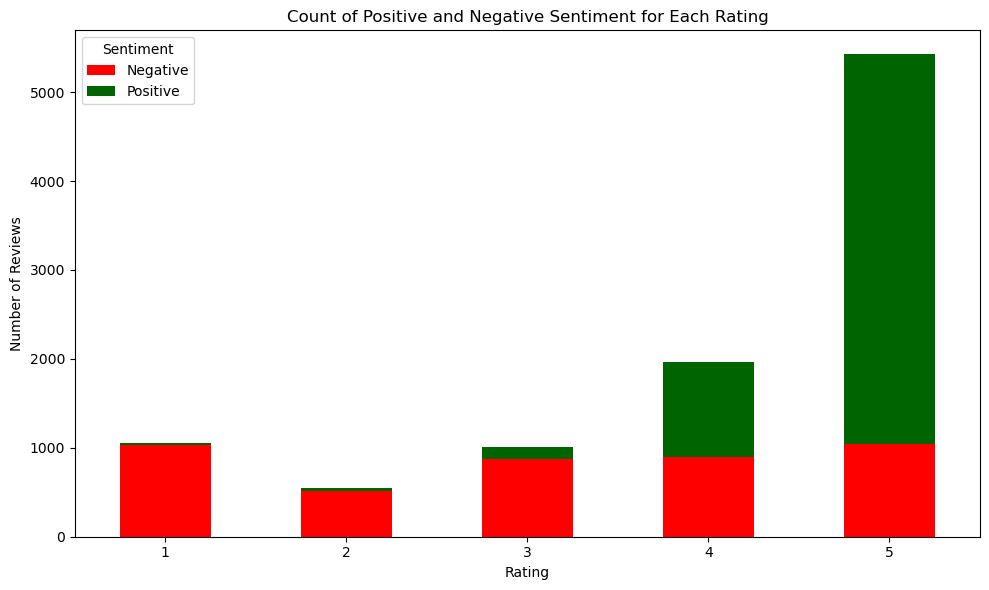

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('classified_reviews_with_sentiment_and_compound.csv')

# Add a column for Compound Score category
df['Compound_Category'] = df['compound_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Group by Rating and Compound_Category and count
rating_sentiment_count = df.groupby(['rating', 'Compound_Category']).size().unstack(fill_value=0)

# Plot Stacked Bar Chart
rating_sentiment_count.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'darkgreen'])
plt.title('Count of Positive and Negative Sentiment for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

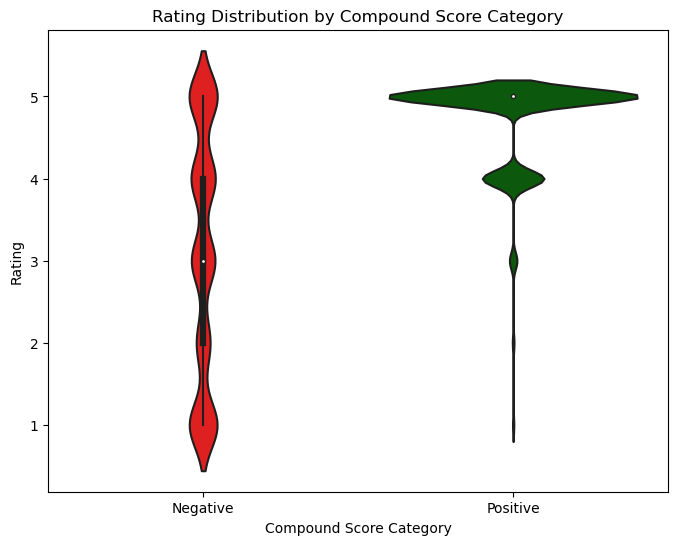

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('classified_reviews_with_sentiment_and_compound.csv')

# Add a column for Compound Score category
df['Compound_Category'] = df['compound_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Violin Plot with custom colors
plt.figure(figsize=(8, 6))
custom_palette = {'Positive': 'darkgreen', 'Negative': 'red'}
sns.violinplot(data=df, x='Compound_Category', y='rating', palette=custom_palette)
plt.title('Rating Distribution by Compound Score Category')
plt.xlabel('Compound Score Category')
plt.ylabel('Rating')
plt.show()


## 4.2 Track Sentiment Shifts Over Time

### Divide the Data into Phases (Pre-COVID, During COVID-19, Post-COVID)

In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv('classified_reviews_with_sentiment_and_compound.csv')

# Convert 'published_date' to datetime format with proper handling of timezone information
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Remove timezone information to make it timezone-naive
df['published_date'] = df['published_date'].apply(lambda x: x.tz_convert(None) if pd.notnull(x) and x.tzinfo is not None else x)

# Define the phases
def determine_phase(date):
    if date < pd.Timestamp('2020-01-30'):
        return 'Pre-COVID'
    elif pd.Timestamp('2020-01-31') <= date <= pd.Timestamp('2022-07-31'):
        return 'During COVID-19'
    else:
        return 'Post-COVID'

# Assign phases to each row
df['phase'] = df['published_date'].apply(determine_phase)

# Extract year and month for grouping
df['year_month'] = df['published_date'].dt.to_period('M')


# Aggregate the data by 'year_month' and 'sentiment'
monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)

# Reset the index to convert 'year_month' back to a regular column
monthly_sentiment = monthly_sentiment.reset_index()

# Convert the 'year_month' column back to a timestamp format for plotting
monthly_sentiment['year_month'] = monthly_sentiment['year_month'].dt.to_timestamp()

# Display the aggregated data
print(monthly_sentiment)

sentiment year_month  negative  positive
0         2018-08-01       134       181
1         2018-09-01       291       511
2         2018-10-01       166       262
3         2018-11-01       145       234
4         2018-12-01       217       477
..               ...       ...       ...
63        2023-11-01        20         9
64        2023-12-01        12        10
65        2024-01-01        36         7
66        2024-02-01        23         8
67        2024-03-01        18         4

[68 rows x 3 columns]


## Sentiment Overview Visualisation

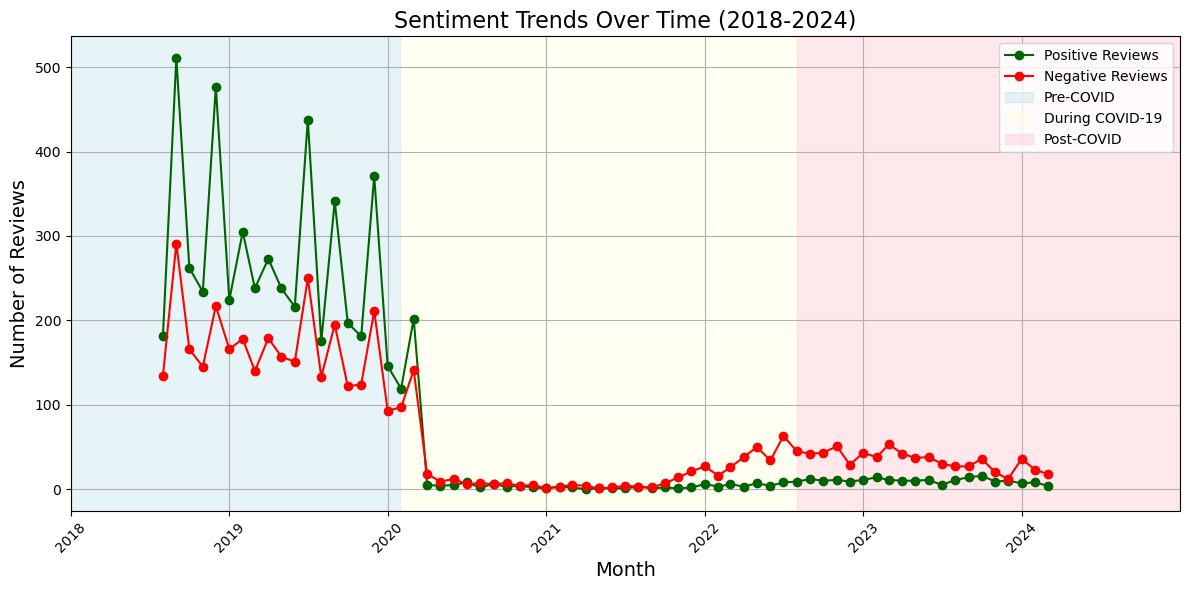

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the line chart with background colors for phases
plt.figure(figsize=(12, 6))

# Plot the positive and negative review counts
plt.plot(monthly_sentiment['year_month'], monthly_sentiment['positive'], label='Positive Reviews', color='darkgreen', marker='o', linestyle='-')
plt.plot(monthly_sentiment['year_month'], monthly_sentiment['negative'], label='Negative Reviews', color='red', marker='o', linestyle='-')

# Shade the background to indicate phases
plt.axvspan(pd.Timestamp('2018-01-01'), pd.Timestamp('2020-01-30'), color='lightblue', alpha=0.3, label='Pre-COVID')
plt.axvspan(pd.Timestamp('2020-01-31'), pd.Timestamp('2022-07-31'), color='lightyellow', alpha=0.4, label='During COVID-19')
plt.axvspan(pd.Timestamp('2022-08-01'), pd.Timestamp('2024-12-31'), color='lightpink', alpha=0.3, label='Post-COVID')

# Add titles and labels
plt.title('Sentiment Trends Over Time (2018-2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend()
plt.grid(True)

# Set x-axis limits and format
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2024-12-31'))
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## 4.3 Sentiment Visualization with EST model

In [29]:
# Filter the data based on the phases
pre_covid = df[df['phase'] == 'Pre-COVID']
during_covid = df[df['phase'] == 'During COVID-19']
post_covid = df[df['phase'] == 'Post-COVID']

In [30]:
# Define a function to aggregate data by month and sentiment
def aggregate_sentiment(data):
    data['year_month'] = data['published_date'].dt.to_period('M')
    sentiment_counts = data.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
    sentiment_counts = sentiment_counts.reset_index()
    sentiment_counts['year_month'] = sentiment_counts['year_month'].dt.to_timestamp()
    return sentiment_counts

# Aggregate sentiment data for each phase
pre_covid_agg = aggregate_sentiment(pre_covid)
during_covid_agg = aggregate_sentiment(during_covid)
post_covid_agg = aggregate_sentiment(post_covid)

/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_37084/3973453328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = data['published_date'].dt.to_period('M')
/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_37084/3973453328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = data['published_date'].dt.to_period('M')
/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_37084/3973453328.py:3: SettingWithCopyWarning: 
A value is trying to be s

### Apply Exponential Smoothing by Phase

In [31]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define a function to smooth the data using the ETS model
def smooth_sentiment(data):
    data['positive_smoothed'] = ExponentialSmoothing(data['positive'], trend='add', seasonal=None, seasonal_periods=12).fit().fittedvalues
    data['negative_smoothed'] = ExponentialSmoothing(data['negative'], trend='add', seasonal=None, seasonal_periods=12).fit().fittedvalues
    return data

# Apply the ETS model to each phase
pre_covid_agg = smooth_sentiment(pre_covid_agg)
during_covid_agg = smooth_sentiment(during_covid_agg)
post_covid_agg = smooth_sentiment(post_covid_agg)

In [33]:
post_covid_agg = post_covid_agg[post_covid_agg['year_month'] >= '2022-08']

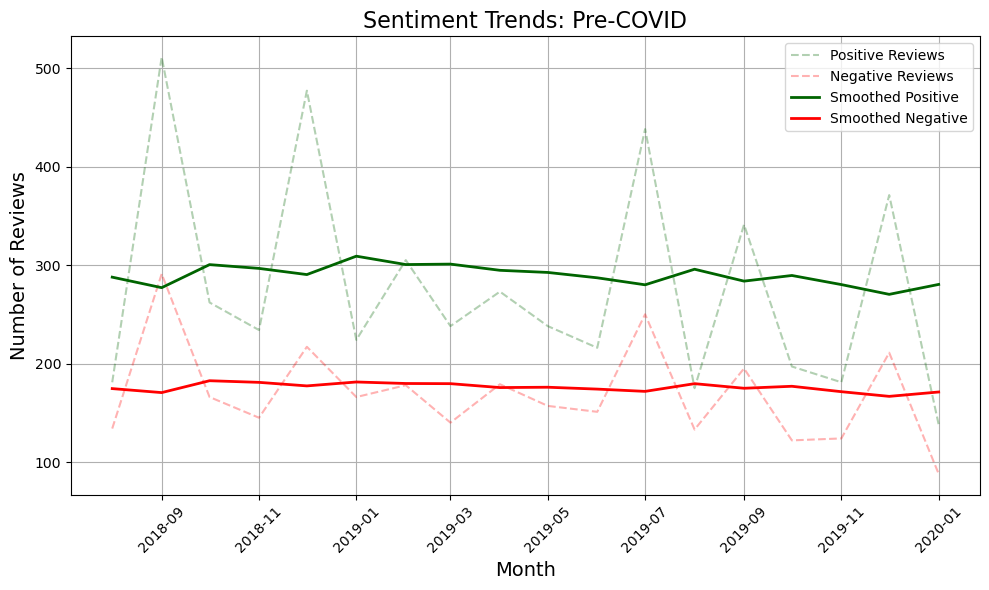

In [34]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def plot_sentiment_trend(data, title):
    plt.figure(figsize=(10, 6))
    
    # Plot the original positive and negative review counts
    plt.plot(data['year_month'], data['positive'], label='Positive Reviews', color='darkgreen', alpha=0.3, linestyle='--')
    plt.plot(data['year_month'], data['negative'], label='Negative Reviews', color='red', alpha=0.3, linestyle='--')
    
    # Apply Exponential Smoothing for both positive and negative sentiments
    model_positive = ExponentialSmoothing(data['positive'], trend=None, seasonal=None, seasonal_periods=12)
    model_negative = ExponentialSmoothing(data['negative'], trend=None, seasonal=None, seasonal_periods=12)

    # Fit the models with custom smoothing levels
    smoothed_positive = model_positive.fit(smoothing_level=0.1).fittedvalues
    smoothed_negative = model_negative.fit(smoothing_level=0.1).fittedvalues

    # Plot the smoothed lines
    plt.plot(data['year_month'], smoothed_positive, label='Smoothed Positive', color='darkgreen', linewidth=2)
    plt.plot(data['year_month'], smoothed_negative, label='Smoothed Negative', color='red', linewidth=2)
    
    # Add titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Reviews', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the trends for each phase
plot_sentiment_trend(pre_covid_agg, 'Sentiment Trends: Pre-COVID')

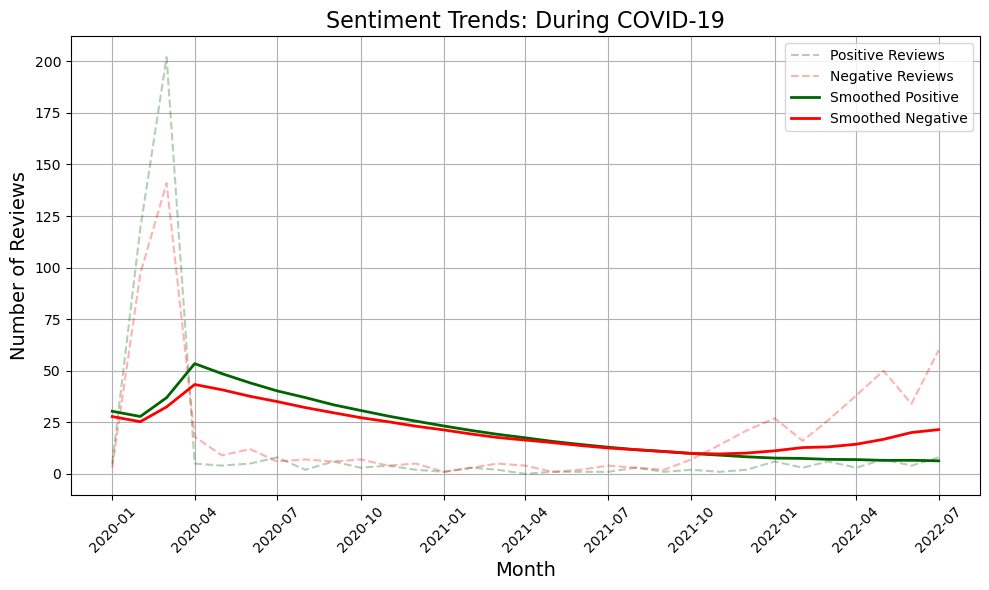

In [35]:
plot_sentiment_trend(during_covid_agg, 'Sentiment Trends: During COVID-19')

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


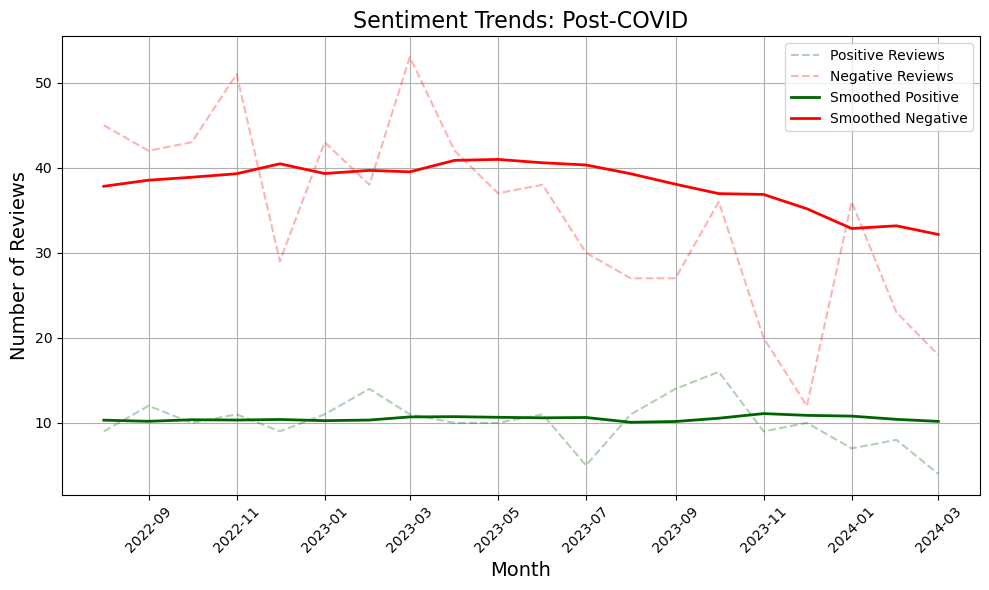

In [36]:
plot_sentiment_trend(post_covid_agg, 'Sentiment Trends: Post-COVID')

### Sentiment Visualisation Over Time (with EST model)

In [37]:
import pandas as pd

# Add a 'phase' column to each DataFrame
pre_covid_agg['phase'] = 'Pre-COVID'
during_covid_agg['phase'] = 'During COVID'
post_covid_agg['phase'] = 'Post-COVID'

# Concatenate the DataFrames
combined_df = pd.concat([pre_covid_agg, during_covid_agg, post_covid_agg], ignore_index=True)

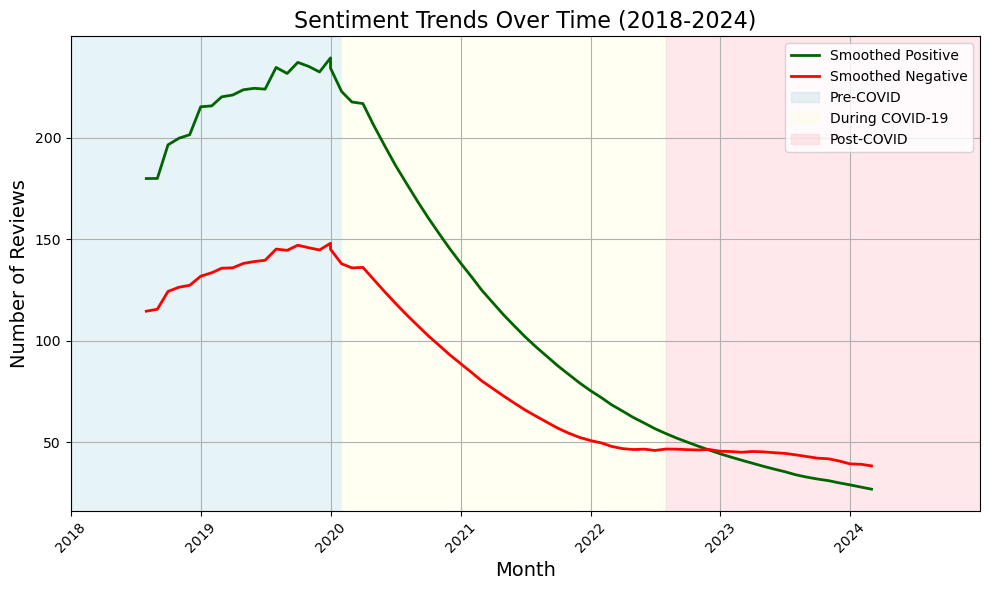

In [38]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def plot_combined_sentiment_trend(data):
    plt.figure(figsize=(10, 6))
    
    # Apply Exponential Smoothing for both positive and negative sentiments
    model_positive = ExponentialSmoothing(data['positive'], trend=None, seasonal=None, seasonal_periods=12)
    model_negative = ExponentialSmoothing(data['negative'], trend=None, seasonal=None, seasonal_periods=12)
    
    # Fit the models with a custom smoothing level
    smoothed_positive = model_positive.fit(smoothing_level=0.05).fittedvalues
    smoothed_negative = model_negative.fit(smoothing_level=0.05).fittedvalues
    
    # Plot the smoothed lines
    plt.plot(data['year_month'], smoothed_positive, label='Smoothed Positive', color='darkgreen', linewidth=2)
    plt.plot(data['year_month'], smoothed_negative, label='Smoothed Negative', color='red', linewidth=2)
    
    # Shade the background for different phases
    plt.axvspan(pd.Timestamp('2018-01-01'), pd.Timestamp('2020-01-30'), color='lightblue', alpha=0.3, label='Pre-COVID')
    plt.axvspan(pd.Timestamp('2020-01-31'), pd.Timestamp('2022-07-31'), color='lightyellow', alpha=0.4, label='During COVID-19')
    plt.axvspan(pd.Timestamp('2022-08-01'), pd.Timestamp('2024-12-31'), color='lightpink', alpha=0.3, label='Post-COVID')
    
    # Set x-axis limits to remove the extra white space
    plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2024-12-31'))
    
    # Add titles and labels
    plt.title('Sentiment Trends Over Time (2018-2024)', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Reviews', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the combined data
plot_combined_sentiment_trend(combined_df)

# Week5: Identifying Frequently Used Keywords

# 1. Keywords Processing

## Remove unnecessary columns

In [39]:
# Load the dataset
df = pd.read_csv('classified_reviews_with_sentiment_and_compound.csv')

# Select only the columns needed
df_reduced = df[['published_date','published_platform','rating', 'text', 
                 'cleaned_review', 'sentiment', 'compound_score']]

# Save the reduced DataFrame to a new CSV file
df_reduced.to_csv('simplified_reviews_with_sentiment.csv', index=False)

print("Saved cleaned file as 'simplified_reviews_with_sentiment.csv'")


Saved cleaned file as 'simplified_reviews_with_sentiment.csv'


## Segment the Data by Sentiment and Phase

In [40]:
# Load the simplified dataset
df = pd.read_csv('simplified_reviews_with_sentiment.csv')

# Segment the dataset by phase and sentiment
pre_covid_positive = df[(df['sentiment'] == 'positive') & (df['published_date'] < '2020-01-30')]
pre_covid_negative = df[(df['sentiment'] == 'negative') & (df['published_date'] < '2020-01-30')]

during_covid_positive = df[(df['sentiment'] == 'positive') & (df['published_date'] >= '2020-01-31') & (df['published_date'] <= '2022-07-31')]
during_covid_negative = df[(df['sentiment'] == 'negative') & (df['published_date'] >= '2020-01-31') & (df['published_date'] <= '2022-07-31')]

post_covid_positive = df[(df['sentiment'] == 'positive') & (df['published_date'] > '2022-07-31')]
post_covid_negative = df[(df['sentiment'] == 'negative') & (df['published_date'] > '2022-07-31')]

## Extract Frequently Mentioned Keywords

In [41]:
from collections import Counter

# Define additional stopwords specific to airlines
custom_stopwords = set(["flight", "airline", "singapore", "flights", "travel", "seat", "service", "class", "staff", 
                        "one", "would", "u","get", "even", "always", "time", "hour", "day", "could", "like", 
                        "told", "like", "fly", "plane", "call", "thank", "customer", "back", "never",
                        "due", "also", "air", "much", "long"])

# Function to extract top keywords excluding custom stopwords
def extract_keywords(reviews):
    all_words = []
    for review in reviews:
        # Assuming `cleaned_review` is preprocessed and tokenized
        words = review.split()  # Split tokenized text into words
        words = [word for word in words if word not in custom_stopwords]  # Remove custom stopwords
        all_words.extend(words)
    return Counter(all_words).most_common(20)

# Extract keywords for each segment
pre_covid_positive_keywords = extract_keywords(pre_covid_positive['cleaned_review'])
pre_covid_negative_keywords = extract_keywords(pre_covid_negative['cleaned_review'])

during_covid_positive_keywords = extract_keywords(during_covid_positive['cleaned_review'])
during_covid_negative_keywords = extract_keywords(during_covid_negative['cleaned_review'])

post_covid_positive_keywords = extract_keywords(post_covid_positive['cleaned_review'])
post_covid_negative_keywords = extract_keywords(post_covid_negative['cleaned_review'])

# Display results
print("Pre-COVID Positive Keywords:", pre_covid_positive_keywords)
print("Pre-COVID Negative Keywords:", pre_covid_negative_keywords)
print("During COVID-19 Positive Keywords:", during_covid_positive_keywords)
print("During COVID-19 Negative Keywords:", during_covid_negative_keywords)
print("Post-COVID Positive Keywords:", post_covid_positive_keywords)
print("Post-COVID Negative Keywords:", post_covid_negative_keywords)

Pre-COVID Positive Keywords: [('good', 3008), ('food', 2735), ('great', 1791), ('crew', 1495), ('comfortable', 1469), ('economy', 1293), ('excellent', 1293), ('entertainment', 1143), ('meal', 1090), ('best', 1051), ('cabin', 1009), ('experience', 978), ('friendly', 943), ('business', 821), ('first', 818), ('well', 815), ('leg', 714), ('flying', 711), ('sq', 618), ('helpful', 603)]
Pre-COVID Negative Keywords: [('food', 1890), ('economy', 1547), ('good', 1397), ('meal', 1201), ('business', 1004), ('sq', 933), ('crew', 890), ('leg', 806), ('passenger', 743), ('first', 726), ('premium', 705), ('cabin', 704), ('better', 701), ('experience', 685), ('great', 655), ('way', 578), ('entertainment', 563), ('airport', 547), ('trip', 537), ('really', 524)]
During COVID-19 Positive Keywords: [('good', 246), ('food', 227), ('great', 163), ('crew', 146), ('comfortable', 114), ('meal', 97), ('excellent', 96), ('friendly', 95), ('entertainment', 86), ('best', 85), ('cabin', 84), ('experience', 77), ('b

# 2. Keywords Visualization 

## 2.1 WordCloud of Top frequency words

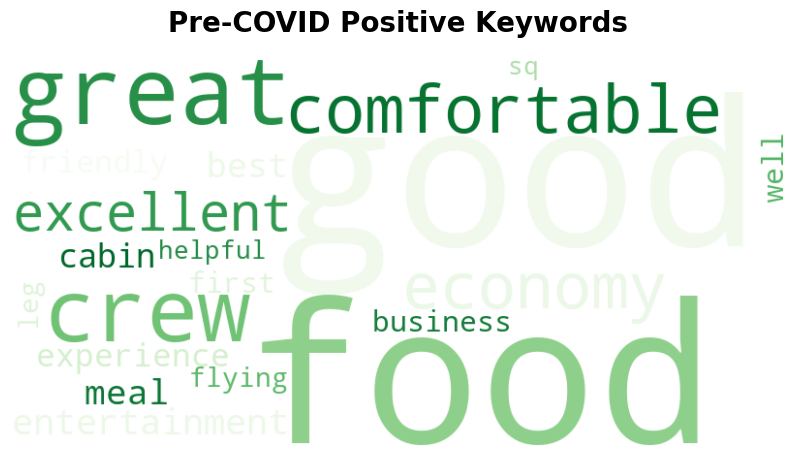

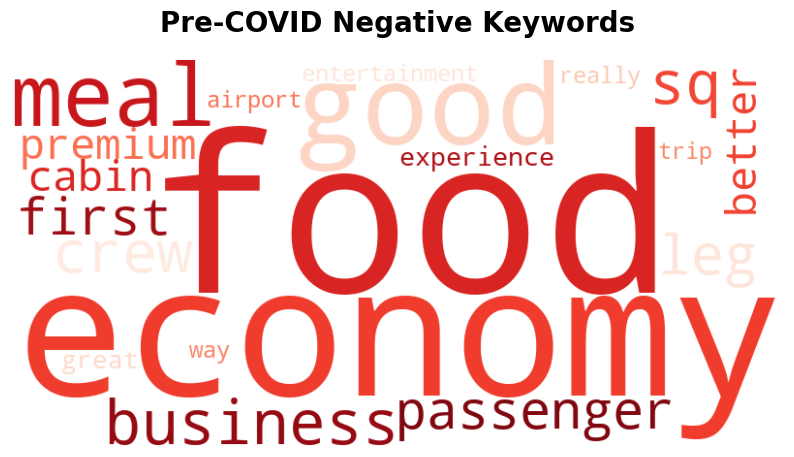

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word clouds with custom colors and improved titles
def generate_wordcloud(words, title, color):
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        colormap=color  # Specify the color map (Greens for positive, Reds for negative)
    ).generate_from_frequencies(dict(words))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    # Enhanced title style
    plt.title(title, fontsize=20, weight='bold', color='black', pad=20)
    plt.show()

# Generate word clouds for positive and negative sentiments
generate_wordcloud(pre_covid_positive_keywords, 'Pre-COVID Positive Keywords', 'Greens')
generate_wordcloud(pre_covid_negative_keywords, 'Pre-COVID Negative Keywords', 'Reds')

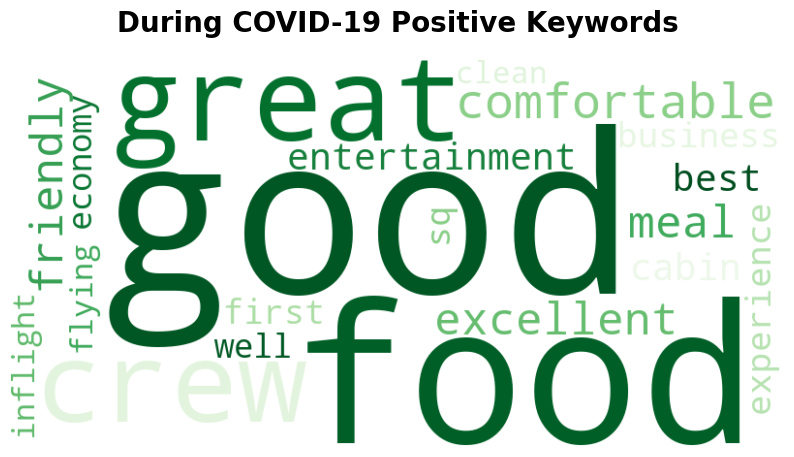

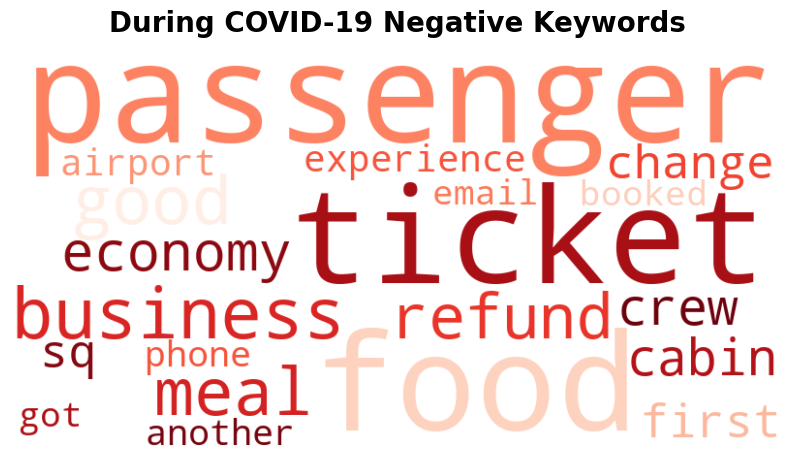

In [43]:
generate_wordcloud(during_covid_positive_keywords, 'During COVID-19 Positive Keywords', 'Greens')
generate_wordcloud(during_covid_negative_keywords, 'During COVID-19 Negative Keywords', 'Reds')

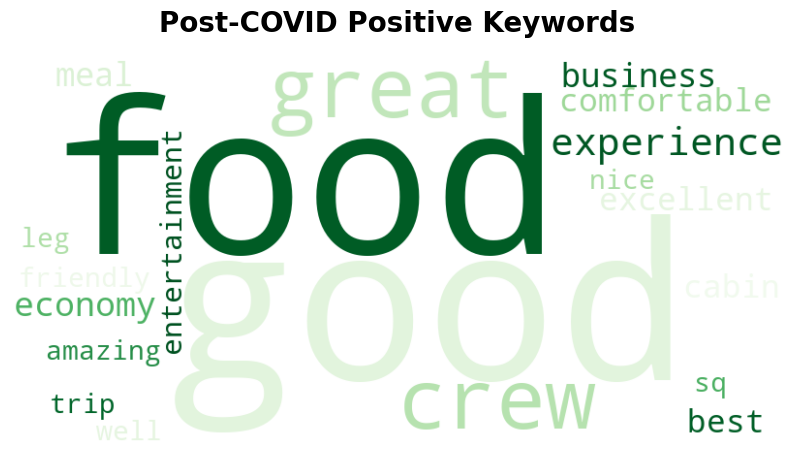

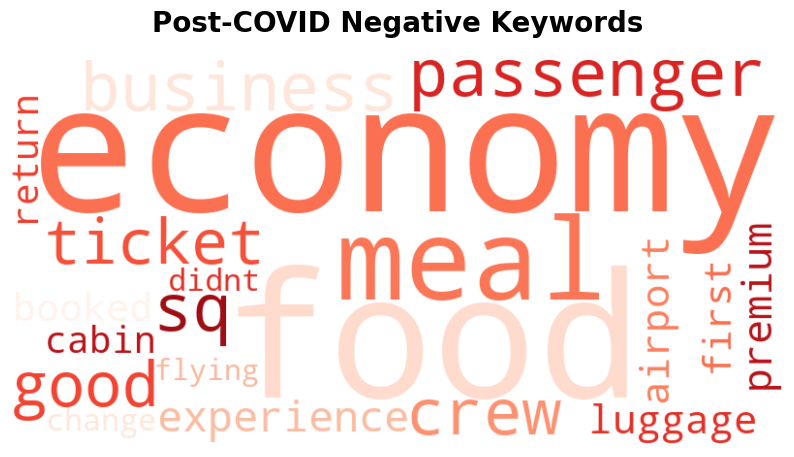

In [44]:
generate_wordcloud(post_covid_positive_keywords, 'Post-COVID Positive Keywords', 'Greens')
generate_wordcloud(post_covid_negative_keywords, 'Post-COVID Negative Keywords', 'Reds')

## 2.2 Bar chart of Top frequency words 

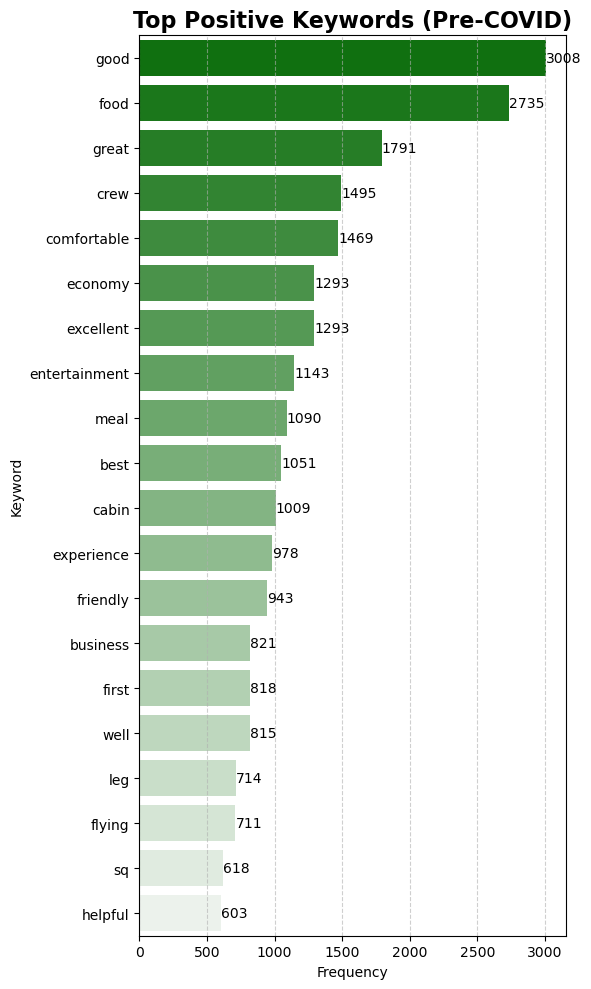

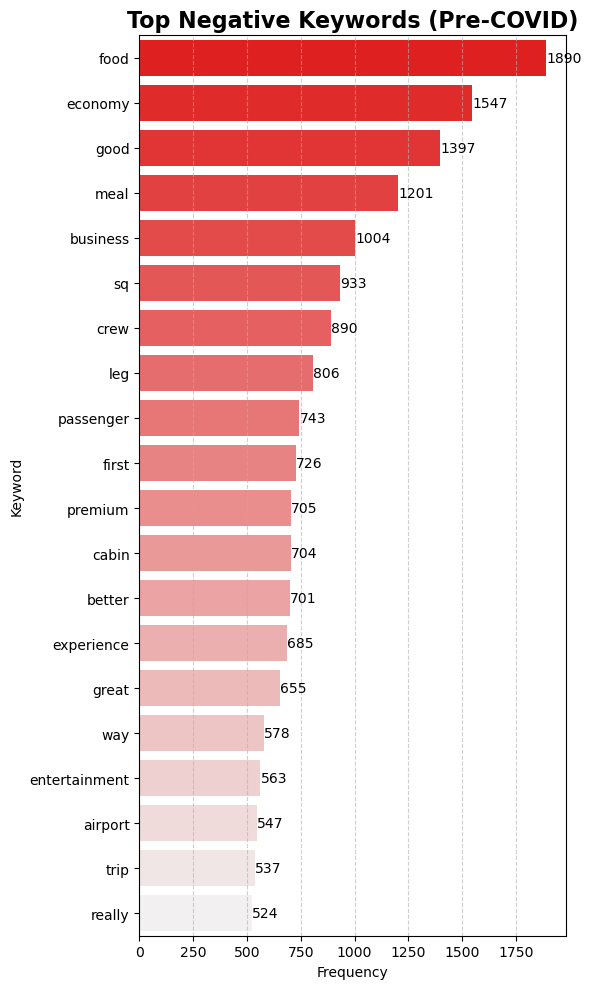

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot bar charts for keywords with improved color scheme
def plot_keywords_bar(keywords, title, color):
    # Convert the keyword list to a DataFrame
    keywords_df = pd.DataFrame(keywords, columns=['Keyword', 'Frequency'])
    
    plt.figure(figsize=(6, 10))
    
    # Use a sequential color palette that goes from light to dark
    barplot = sns.barplot(
        x='Frequency', 
        y='Keyword', 
        data=keywords_df, 
        palette=sns.light_palette(color, n_colors=len(keywords), reverse=True)
    )
    
    # Add value labels to each bar
    for index, value in enumerate(keywords_df['Frequency']):
        barplot.text(value + 1, index, str(value), color='black', va='center')
    
    # Improve the title visibility
    plt.title(title, fontsize=16, weight='bold', color='black')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot bar charts for each phase with the improved function
plot_keywords_bar(pre_covid_positive_keywords, 'Top Positive Keywords (Pre-COVID)', 'green') 
plot_keywords_bar(pre_covid_negative_keywords, 'Top Negative Keywords (Pre-COVID)', 'red')  

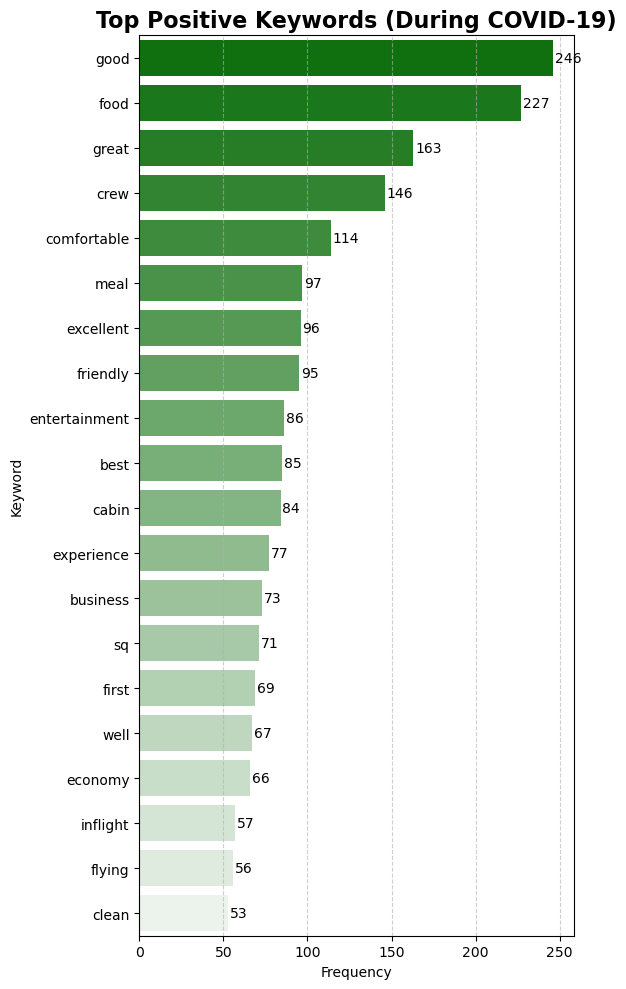

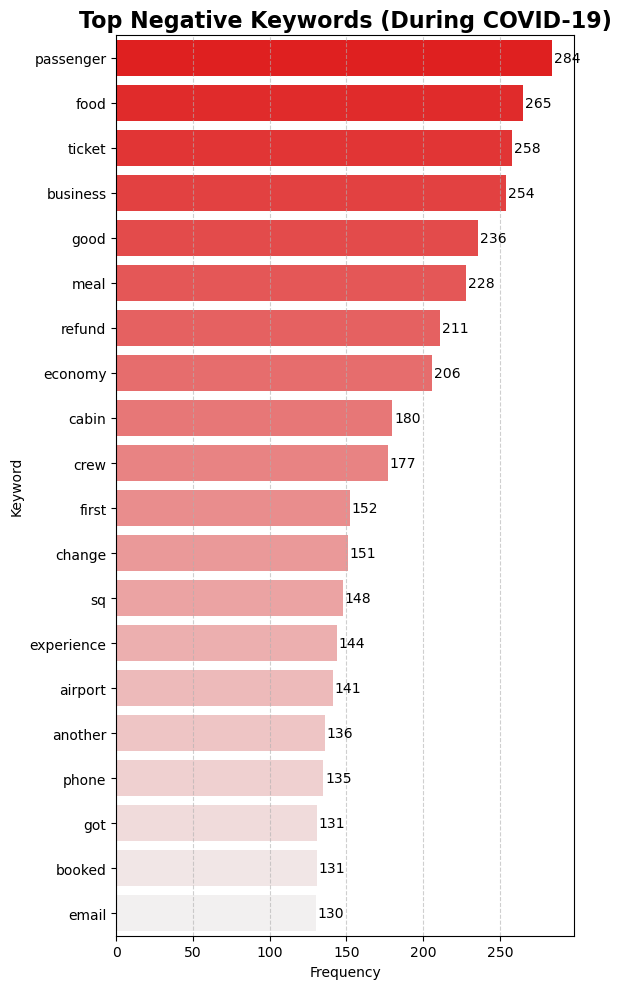

In [46]:
plot_keywords_bar(during_covid_positive_keywords, 'Top Positive Keywords (During COVID-19)', 'green')
plot_keywords_bar(during_covid_negative_keywords, 'Top Negative Keywords (During COVID-19)', 'red')

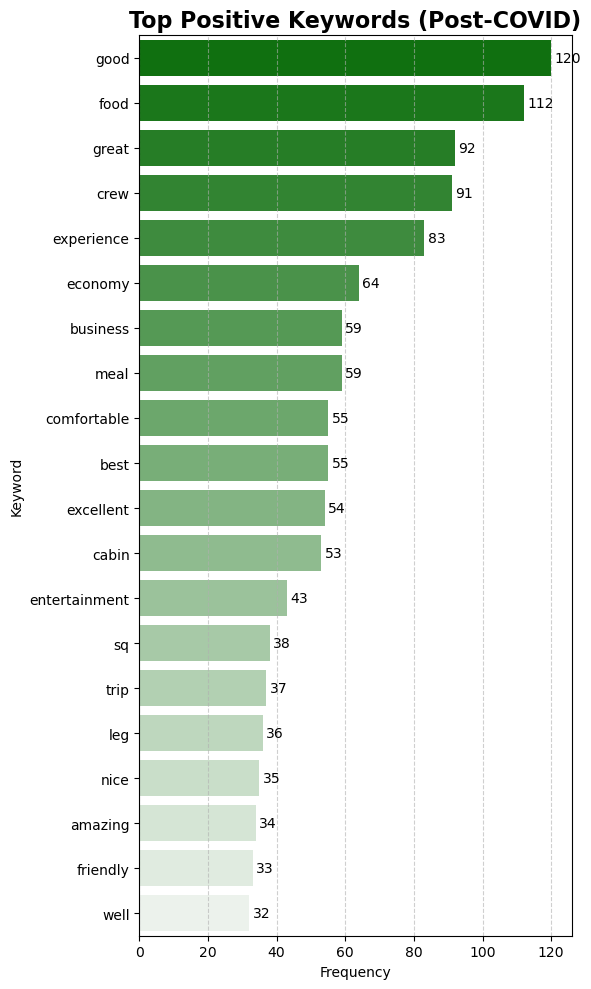

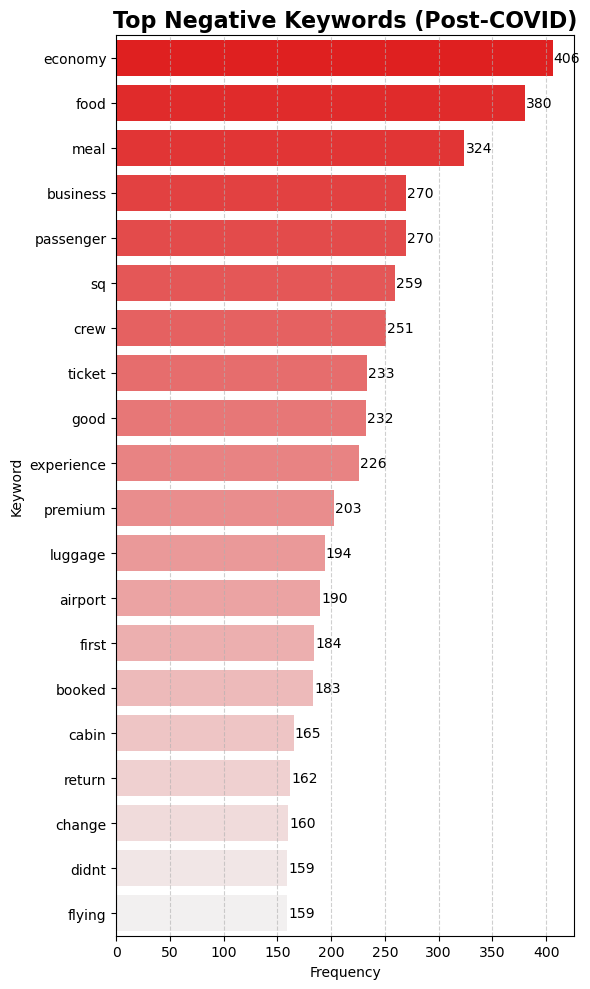

In [47]:
plot_keywords_bar(post_covid_positive_keywords, 'Top Positive Keywords (Post-COVID)', 'green')
plot_keywords_bar(post_covid_negative_keywords, 'Top Negative Keywords (Post-COVID)', 'red')